# PubChem Periodic Table API in Python

by Avery Fernandez and Vincent F. Scalfani

PubChem is a database of chemical molecules and their properties. It is maintained by the National Center for Biotechnology Information (NCBI), a division of the National Library of Medicine (NLM) at the National Institutes of Health (NIH). PubChem is a key chemical information resource for scientists, students, and the general public.

Please see the following resources for more information on API usage:
- Documentation
    - <a href="https://pubchemdocs.ncbi.nlm.nih.gov/periodic-table/" target="_blank">PubChem Periodic Table API Documentation</a>
    - <a href="https://pubchemdocs.ncbi.nlm.nih.gov/programmatic-access" target="_blank">PubChem Programmatic Access</a>
    - <a href="https://pubchem.ncbi.nlm.nih.gov/docs/pug-rest" target="_blank">PUG-REST API Documentation</a>
- Terms
    - <a href="https://www.ncbi.nlm.nih.gov/home/about/policies/" target="_blank">NCBI Policies and Disclaimers</a>
- Data Reuse
    - <a href="https://www.ncbi.nlm.nih.gov/home/about/policies/" target="_blank">NCBI Copyright Information</a>

_**NOTE:**_ The PubChem limits requests to a maximum of 5 requests per second.

*These recipe examples were tested on April 9, 2025.*

## Setup

### Import Libraries

The following external libraries need to be installed into your enviornment to run the code examples in this tutorial:
* <a href="https://github.com/psf/requests" target="_blank">requests</a>
* <a href="https://github.com/ipython/ipykernel" target="_blank">ipykernel</a>
* <a href="https://github.com/matplotlib/matplotlib" target="_blank">matplotlib</a>

We import the libraries used in this tutorial below:

In [1]:
import requests
from pprint import pprint
import matplotlib.pyplot as plt

## 1. Create a Periodic Table Data Structure

To begin, we download the PubChem machine-readable periodic table data:

In [ ]:
# This script fetches the periodic table data from PubChem
BASE_URL = "https://pubchem.ncbi.nlm.nih.gov/rest/pug/periodictable/JSON"

try:
    response = requests.get(BASE_URL)
    response.raise_for_status()
    data = response.json()
    pprint(data, depth=2)
except requests.exceptions.RequestException as e:
    print(f"Error fetching data: {e}")
    data = None

{'Table': {'Columns': {...}, 'Row': [...]}}


From the output above, we can see the general structure of the data returned by the API. The `Columns` section of the data contains the categories of data stored for each element, and the `Rows` section contains those data points for each element.

In [3]:
# Print the categories
if data:
    pprint(data['Table']['Columns']['Column'])

['AtomicNumber',
 'Symbol',
 'Name',
 'AtomicMass',
 'CPKHexColor',
 'ElectronConfiguration',
 'Electronegativity',
 'AtomicRadius',
 'IonizationEnergy',
 'ElectronAffinity',
 'OxidationStates',
 'StandardState',
 'MeltingPoint',
 'BoilingPoint',
 'Density',
 'GroupBlock',
 'YearDiscovered']


In [4]:
# Print the data associated with the first entry (Hydrogen)
if data:
    pprint(data['Table']['Row'][0])

{'Cell': ['1',
          'H',
          'Hydrogen',
          '1.0080',
          'FFFFFF',
          '1s1',
          '2.2',
          '120',
          '13.598',
          '0.754',
          '+1, -1',
          'Gas',
          '13.81',
          '20.28',
          '0.00008988',
          'Nonmetal',
          '1766']}


Now we want to parse all periodic table data from structure array into a list of dictionaries using both list comprehension and dictionary comprehension. This data structure will be a list, with each element storing the data associated with an element as a dictionary.

In [5]:
# Grab out the data for each element and put it into a list
elements = []
if data:
    # Loop through each row in the data and extract the relevant information
    for row in data["Table"]["Row"]:
        element = {}
        # Loop through each column in the row and extract the relevant information
        for idx, column in enumerate(data["Table"]["Columns"]["Column"]):
            element[str(column)] = row["Cell"][idx]
        elements.append(element)

In [6]:
# Display first element (Hydrogen)
elements[0]

{'AtomicNumber': '1',
 'Symbol': 'H',
 'Name': 'Hydrogen',
 'AtomicMass': '1.0080',
 'CPKHexColor': 'FFFFFF',
 'ElectronConfiguration': '1s1',
 'Electronegativity': '2.2',
 'AtomicRadius': '120',
 'IonizationEnergy': '13.598',
 'ElectronAffinity': '0.754',
 'OxidationStates': '+1, -1',
 'StandardState': 'Gas',
 'MeltingPoint': '13.81',
 'BoilingPoint': '20.28',
 'Density': '0.00008988',
 'GroupBlock': 'Nonmetal',
 'YearDiscovered': '1766'}

## 2. Plot Melting and Boiling Points of Elements

Create a new Atomic Number variable (AN) by converting AtomicNumber cell variable to a double array

In [7]:
AN = [int(cell["AtomicNumber"]) for cell in elements]

# Display atomic numbers of first 5 elements
AN[:5]

[1, 2, 3, 4, 5]

Create a new Melting Point variable (MP) by converting MeltingPoint cell variable to a double array

In [8]:
MP = []
for cell in elements:
    if cell["MeltingPoint"]:
        MP.append(float(cell["MeltingPoint"]))
    else:
        MP.append(float('nan'))

# Display melting points of first 5 elements
MP[:5]

[13.81, 0.95, 453.65, 1560.0, 2348.0]

Create a new Boiling Point variable (BP) by converting BoilingPoint cell variable to a double array

In [9]:
BP = []

for cell in elements:
    if cell["BoilingPoint"]:
        BP.append(float(cell["BoilingPoint"]))
    else:
        BP.append(float('nan'))

# Display boiling points of first 5 elements
BP[:5]

[20.28, 4.22, 1615.0, 2744.0, 4273.0]

We can also extract the element symbol from the Element cell variable

In [10]:
Symbol = [str(cell["Symbol"]) for cell in elements]

# Display symbols of first 5 elements
Symbol[:5]

['H', 'He', 'Li', 'Be', 'B']

Now that the data has been formatted as lists, we can create some plots.

### Line Plot

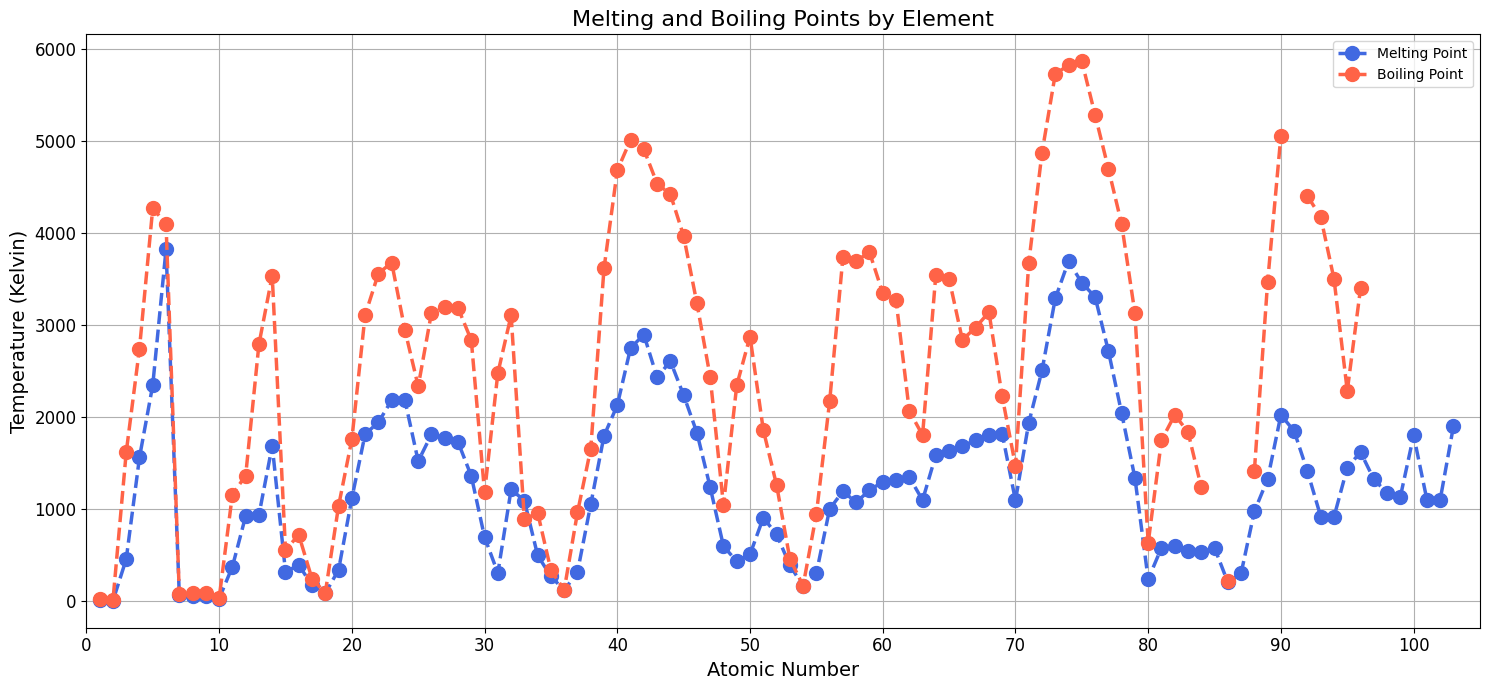

In [11]:
fig, ax = plt.subplots(figsize=(15, 7))

ax.boxplot([MP, BP])
ax.set_xlabel('Atomic Number', fontsize=14)
ax.set_xlim([0, 105])
ax.set_ylabel('Temperature (Kelvin)', fontsize=14)

mp_line, = ax.plot(AN, MP, '--o', label='Melting Point', 
                   linewidth=2.5, markersize=10, color='royalblue')
bp_line, = ax.plot(AN, BP, '--o', label='Boiling Point', 
                   linewidth=2.5, markersize=10, color='tomato')

ax.legend()
ax.grid(True)

ax.set_title('Melting and Boiling Points by Element', fontsize=16)

ax.set_xticks(range(0, 101, 10))
ax.set_xticklabels(range(0, 101, 10))

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

### Grouped Bar Chart

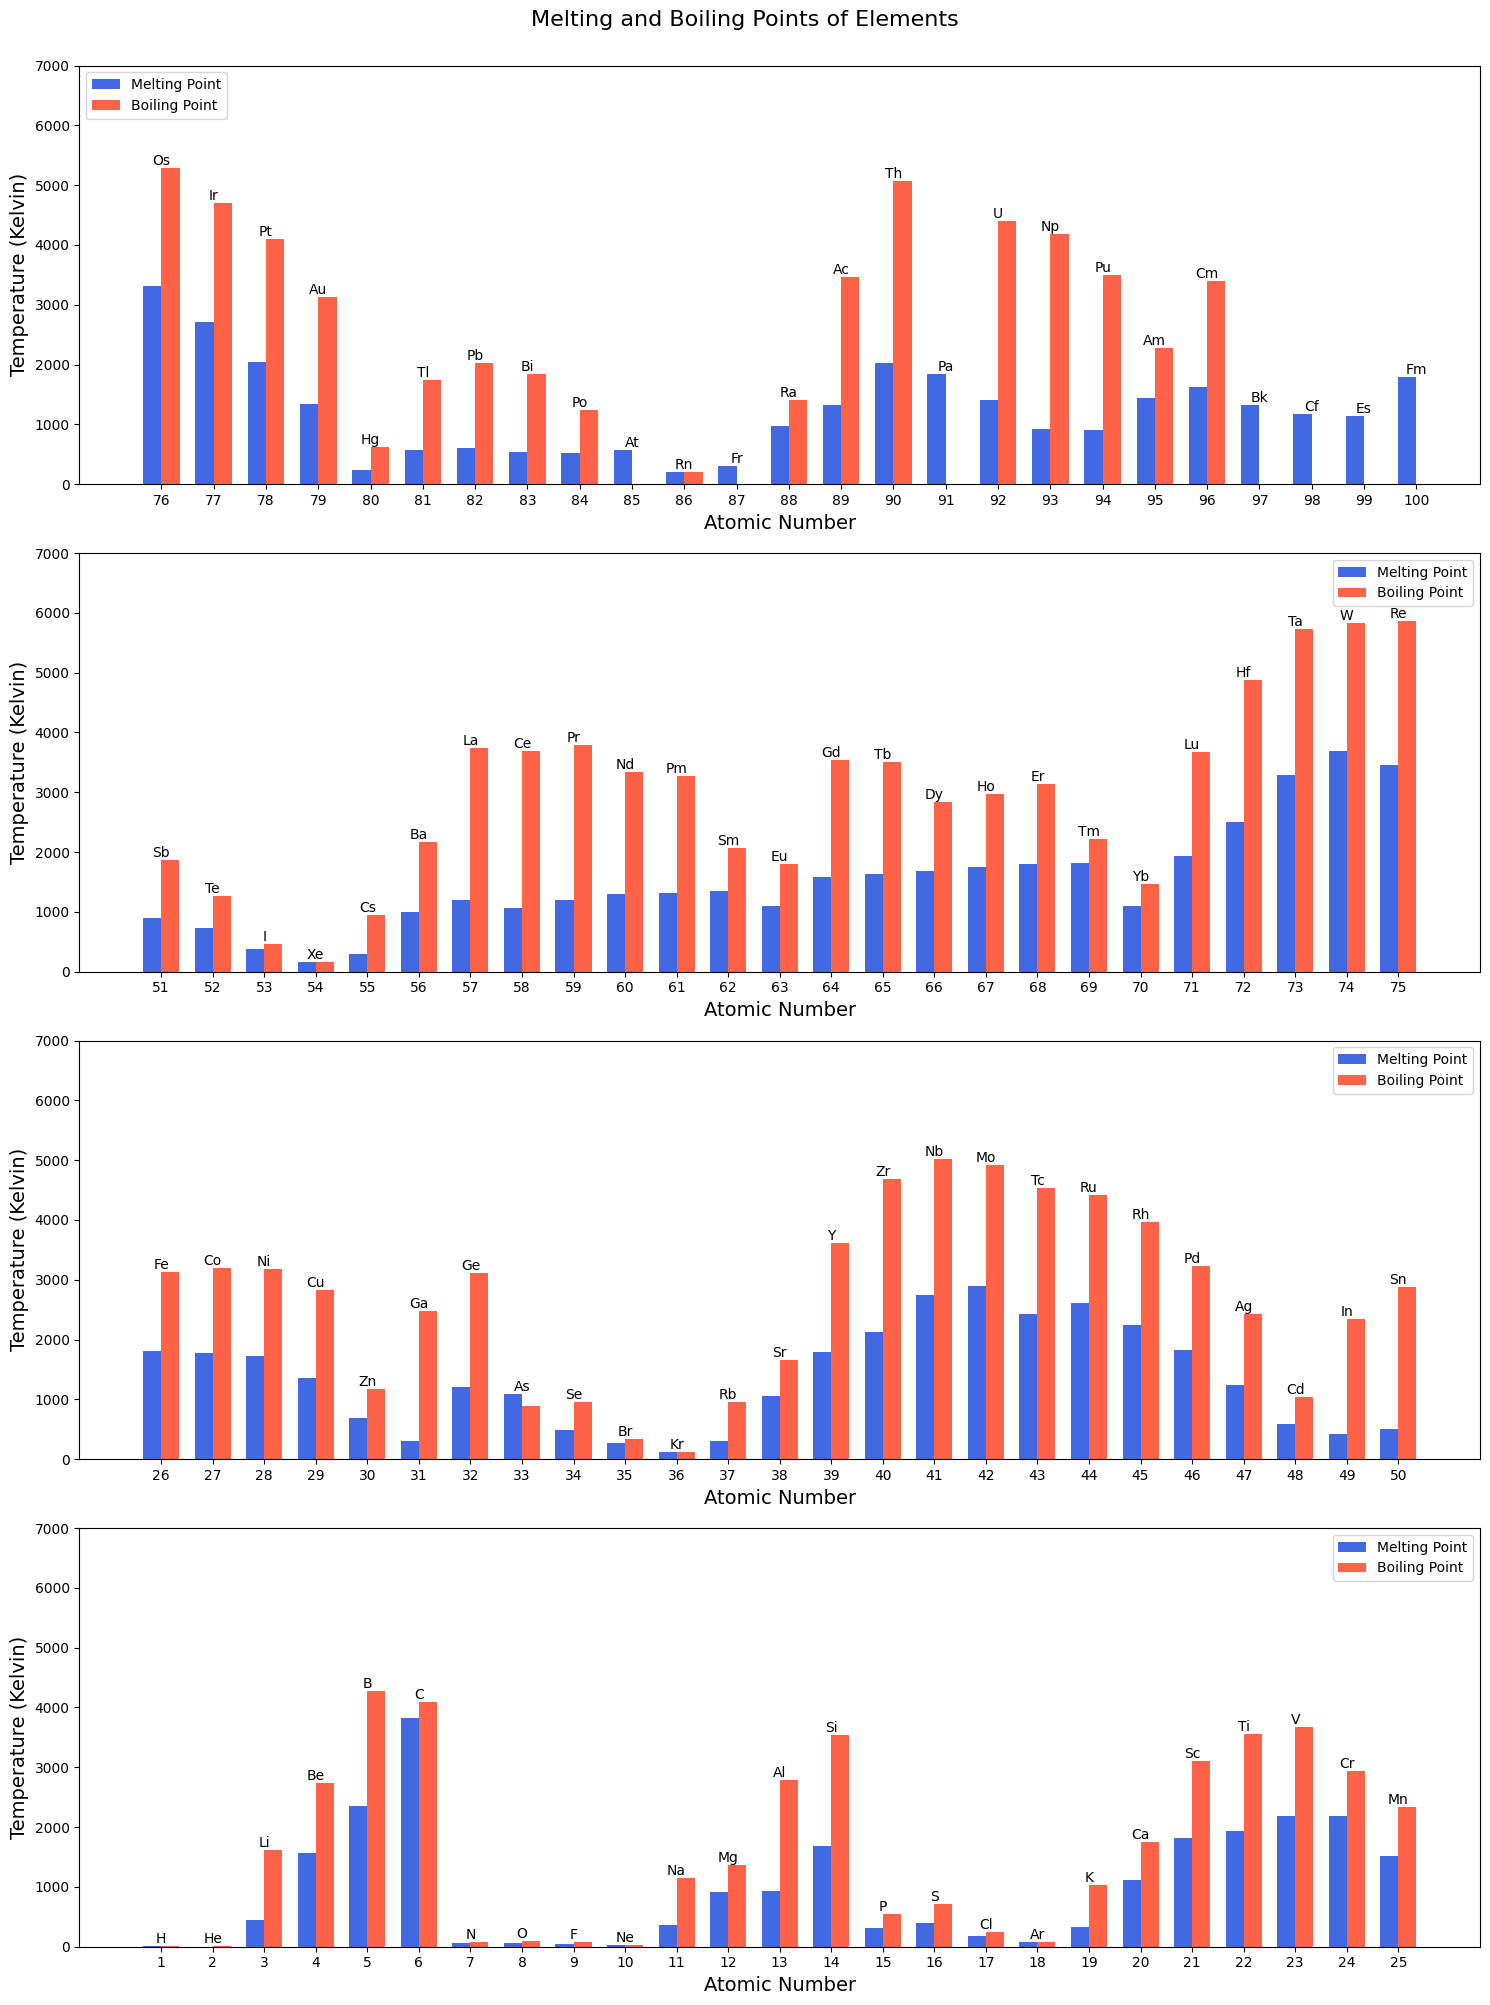

In [12]:
# Plot grouped bar chart of Melting Point and Boiling Point
fig, axs = plt.subplots(nrows=4, ncols=1, figsize=(15, 20))

# Define a function to plot the bar charts
def plot_bar_chart(ax, start, end):
    # Grabs the values for the given range
    x = AN[start:end]
    y1 = MP[start:end]
    y2 = BP[start:end]
    symbols = Symbol[start:end]

    width = 0.35
    # Create the two bars
    ax.bar([p - width / 2 for p in x], y1, width, label='Melting Point', color='royalblue')
    ax.bar([p + width / 2 for p in x], y2, width, label='Boiling Point', color='tomato')

    # Creates the labels along with limiting the y axis to 0-7000
    ax.set_xticks(x)
    ax.set_ylim([0, 7000])
    ax.set_xlabel('Atomic Number', fontsize=14)
    ax.set_ylabel('Temperature (Kelvin)', fontsize=14)
    ax.legend()

    # Adds the atomic symbols on the top of the bars
    for i, label in enumerate(symbols):
        ax.text(x[i], max(y1[i], y2[i]), label, ha='center', va='bottom')

# Plot elements 1-25
plot_bar_chart(axs[3], 0, 25)

# Plot elements 26-50
plot_bar_chart(axs[2], 25, 50)

# Plot elements 51-75
plot_bar_chart(axs[1], 50, 75)

# Plot elements 76-100
plot_bar_chart(axs[0], 75, 100)

fig.suptitle('Melting and Boiling Points of Elements', fontsize=16, y=1)

plt.tight_layout()
plt.show()